In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm

from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [38]:
train = pd.read_csv("/Users/karnavivek/Downloads/Food Demand/data/train.csv")
meal_info = pd.read_csv("/Users/karnavivek/Downloads/Food Demand/data/meal_info.csv")
fulfilment_center_info = pd.read_csv("/Users/karnavivek/Downloads/Food Demand/data/fulfilment_center_info.csv")
test = pd.read_csv("/Users/karnavivek/Downloads/Food Demand/data/test.csv")

merge1 = pd.merge(train, fulfilment_center_info, how='left')
merge2 = pd.merge(merge1, meal_info, how='left')

merge2[['center_id', 'meal_id', 'emailer_for_promotion', 'homepage_featured']] = merge2[['center_id', 'meal_id', 'emailer_for_promotion', 'homepage_featured']].astype('object')

df_weekly_orders = merge2.groupby(['week'])['num_orders'].sum().reset_index()
df_weekly_orders.set_index(df_weekly_orders['week'], inplace=True)
df_weekly_orders.drop(columns='week', inplace=True)

In [39]:
train_orders  = df_weekly_orders [:124]
test_orders = df_weekly_orders[124:]
train_orders.shape, test_orders.shape

((124, 1), (21, 1))

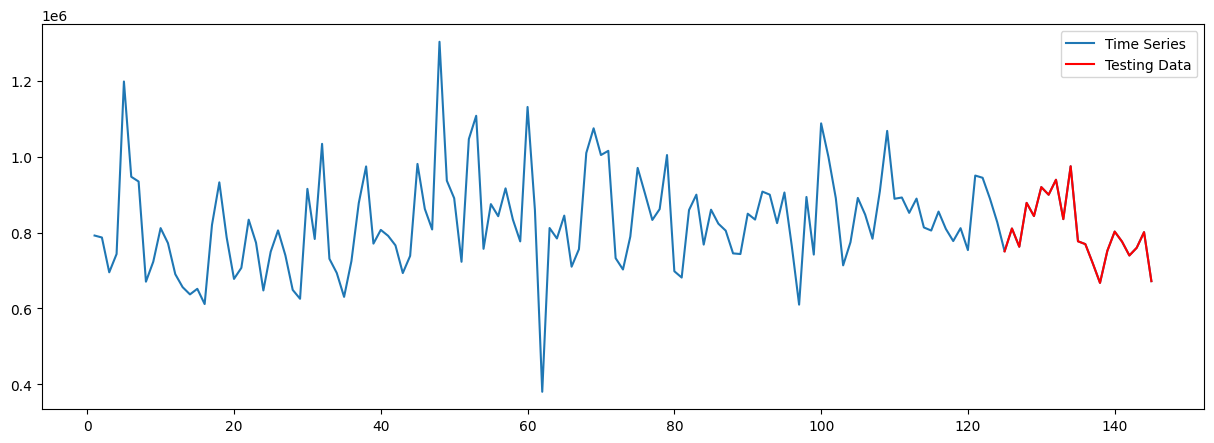

In [40]:
plt.figure(figsize=(15,5))
plt.plot(df_weekly_orders['num_orders'], label = 'Time Series')
plt.plot(test_orders, color='red', label='Testing Data')
plt.legend()
plt.show()

In [41]:
df_weekly_orders

,num_orders
week,
1,792261
2,787084
3,695262
4,743529
5,1198675
...,...
141,776240
142,739661
143,759926


In [42]:
''' Scale the data - (0, 1)'''
scaler = MinMaxScaler(feature_range=(0, 1))

train_orders = scaler.fit_transform(train_orders)
test_orders  = scaler.fit_transform(test_orders)

In [48]:
#shape of the datasets
print(f'Shape of Training set: {train_orders.shape}')
print(f'Shape of Testing set : {test_orders.shape}')

Shape of Training set: (124, 1)
Shape of Testing set : (21, 1)


In [64]:
'''Let's Create Dataset for LSTM model, i.e. converting time series into inputs and labele'''
def create_dataset(df, lookback):
    X_data, y_data = [], []

    for i in range(lookback, len(df)):
        X_data.append(df[i-lookback:i, 0])
        y_data.append(df[i,0])

    return np.array(X_data), np.array(y_data)

lookback = 7
X_train, y_train = create_dataset(train_orders, lookback)
X_test, y_test = create_dataset(test_orders, lookback)


In [65]:
print("Shape of train input: " + str(X_train.shape))
print("Shape of train labels: " + str(y_train.shape))
print("Shape of test input: " + str(X_test.shape))
print("Shape of test labels: " + str(y_test.shape))

Shape of train input: (117, 7)
Shape of train labels: (117,)
Shape of test input: (14, 7)
Shape of test labels: (14,)


In [66]:
'''Reshaping the data to tensorflow can understand'''

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

print("Shape of train input: " + str(X_train.shape))
print("Shape of train labels: " + str(y_train.shape))
print("Shape of test input: " + str(X_test.shape))
print("Shape of test labels: " + str(y_test.shape))

Shape of train input: (117, 1, 7)
Shape of train labels: (117,)
Shape of test input: (14, 1, 7)
Shape of test labels: (14,)


In [67]:
'''Creating LSTM Model using keras'''

model = Sequential()
model.add(LSTM(4, input_shape = (1, lookback)))
# model.add(LSTM())
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer='Adam')

In [74]:
'''lets visualize it'''
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

def plot_tf_model(model, show_shapes=True, show_layers_names=True):
    return SVG(model_to_dot(model, show_shapes=show_shapes, show_layers_names=show_layers_names).create(prog='dot',format='svg'))

plot_tf_model(model, show_shapes=True, show_layers_names=False)

ImportError: You must install pydot (`pip install pydot`) for model_to_dot to work.

In [78]:
model.fit(X_train, y_train, epochs=300, batch_size=2, verbose=2)

Epoch 1/300
59/59 - 0s - 5ms/step - loss: 0.0151
Epoch 2/300
59/59 - 0s - 617us/step - loss: 0.0155
Epoch 3/300
59/59 - 0s - 571us/step - loss: 0.0152
Epoch 4/300
59/59 - 0s - 556us/step - loss: 0.0154
Epoch 5/300
59/59 - 0s - 546us/step - loss: 0.0152
Epoch 6/300
59/59 - 0s - 593us/step - loss: 0.0152
Epoch 7/300
59/59 - 0s - 590us/step - loss: 0.0150
Epoch 8/300
59/59 - 0s - 591us/step - loss: 0.0151
Epoch 9/300
59/59 - 0s - 612us/step - loss: 0.0153
Epoch 10/300
59/59 - 0s - 612us/step - loss: 0.0153
Epoch 11/300
59/59 - 0s - 591us/step - loss: 0.0151
Epoch 12/300
59/59 - 0s - 568us/step - loss: 0.0152
Epoch 13/300
59/59 - 0s - 573us/step - loss: 0.0152
Epoch 14/300
59/59 - 0s - 579us/step - loss: 0.0152
Epoch 15/300
59/59 - 0s - 571us/step - loss: 0.0152
Epoch 16/300
59/59 - 0s - 733us/step - loss: 0.0154
Epoch 17/300
59/59 - 0s - 571us/step - loss: 0.0151
Epoch 18/300
59/59 - 0s - 558us/step - loss: 0.0151
Epoch 19/300
59/59 - 0s - 553us/step - loss: 0.0151
Epoch 20/300
59/59 - 0s

In [79]:
'''Lets predict now'''

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [80]:
y_test.shape

(14,)

In [81]:
'''Inverse Transforming the data'''
train_pred = scaler.inverse_transform(train_pred)
y_train = scaler.inverse_transform([y_train])

test_pred = scaler.inverse_transform(test_pred)
y_test = scaler.inverse_transform([y_test])

In [86]:
y_train[0]

array([764139.17241323, 781710.27063046, 811231.04867272, 798033.97917244,
       770718.04486285, 759334.9059002 , 752962.65423569, 757874.23025324,
       744475.87211715, 814050.42261142, 851467.11397868, 803023.20461408,
       766577.29767748, 776301.47169133, 818658.06611926, 798382.56843247,
       756415.22090293, 790488.32140413, 809224.82750121, 787299.36286756,
       756922.44160443, 749107.84355615, 845748.05060256, 801696.16595877,
       885340.25888139, 784274.03466242, 771832.4640651 , 750788.80362078,
       782250.81726504, 833235.49576778, 865466.0054289 , 797613.73915628,
       809676.06063514, 804455.21995859, 796055.75178472, 771721.82196727,
       786822.46876516, 867676.51457019, 828158.95638147, 810045.97849234,
       975072.        , 852940.12022088, 837542.87261856, 781641.28594898,
       889542.32578363, 910012.78017895, 793049.41936144, 832333.02949993,
       821703.72314358, 846188.6194379 , 818769.37473576, 799552.30868364,
       917752.06161847, 8

In [88]:
train_score = np.sqrt(mean_squared_error(y_train[0], train_pred[:,0]))
print('Train Score: %.2f RMSE' % (train_score))
test_score = np.sqrt(mean_squared_error(y_test[0], test_pred[:,0]))
print('Test Score: %.2f RMSE' % (test_score))

Train Score: 36788.04 RMSE
Test Score: 107064.97 RMSE


In [99]:
X_train.shape, X_test.shape, y_train[0].shape, train_pred[:,0].shape, y_test[0].shape, test_pred[:,0].shape

((117, 1, 7), (14, 1, 7), (117,), (117,), (14,), (14,))

In [100]:
week_train = list(range(1, len(X_train)+1))
week_train

trainActual = pd.DataFrame({'Number of Orders':y_train[0]})
trainActual.index = week_train

trainPred = pd.DataFrame({'Number of Orders': train_pred[:,0]})
trainPred.index = week_train

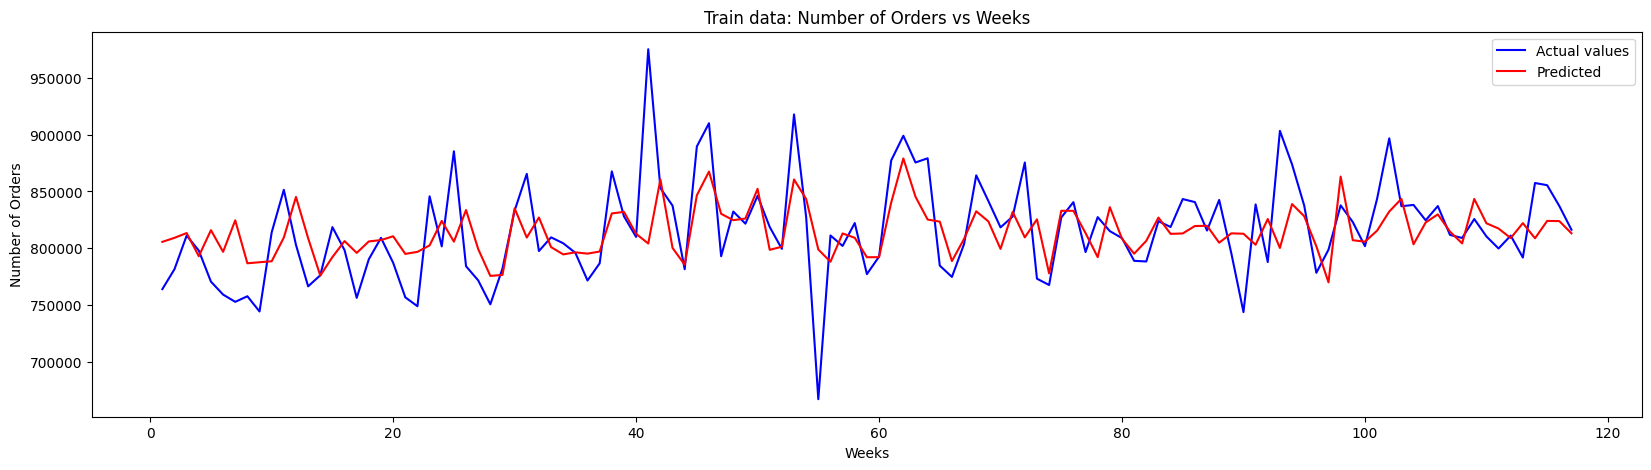

In [104]:
plt.figure(figsize=(20,5))
plt.plot(trainActual, color='blue', label='Actual values')
plt.plot(trainPred, color='red', label='Predicted')
plt.title('Train data: Number of Orders vs Weeks')
plt.xlabel('Weeks')
plt.ylabel('Number of Orders')
plt.legend(loc='best')
plt.show()

In [105]:
week_test = list(range(len(X_train)+1, len(X_train)+len(X_test)+1))
week_test

[118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131]

In [106]:
testActual = pd.DataFrame({'Number of Orders': y_test[0]})
testActual.index = week_test

testPred = pd.DataFrame({'Number of Orders': test_pred[:,0]})
testPred.index = week_test

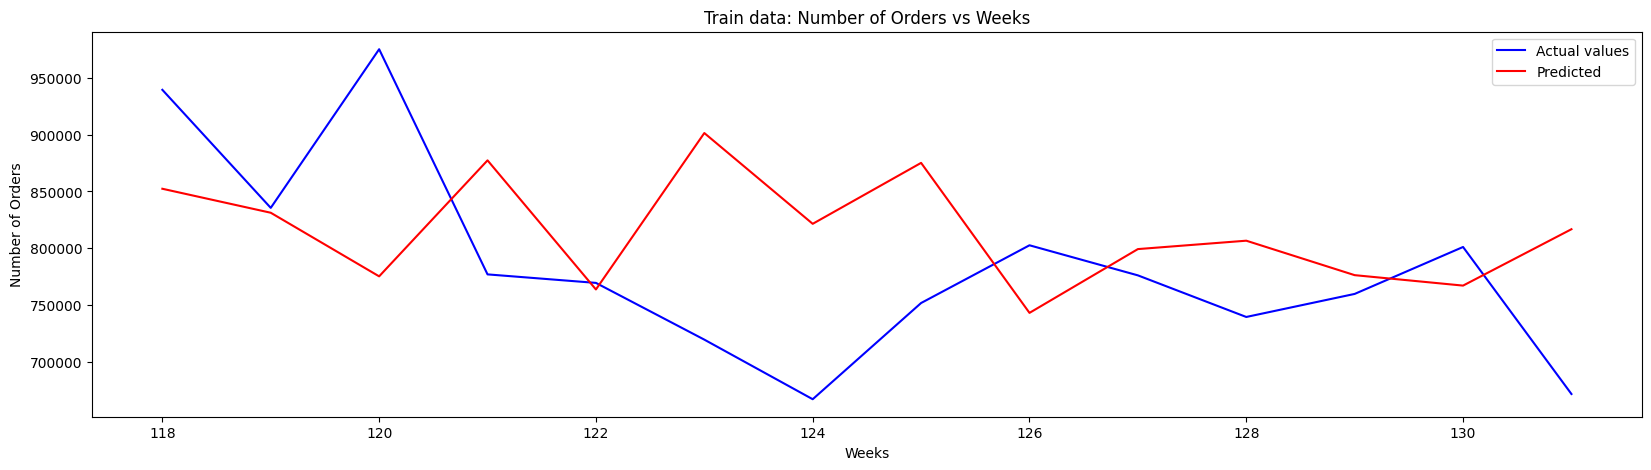

In [107]:
plt.figure(figsize=(20,5))
plt.plot(testActual, color='blue', label='Actual values')
plt.plot(testPred, color='red', label='Predicted')
plt.title('Train data: Number of Orders vs Weeks')
plt.xlabel('Weeks')
plt.ylabel('Number of Orders')
plt.legend(loc='best')
plt.show()